### Работа с CSV файлом

#### Считывание CSV файла как текстового файла

In [ ]:
# Считывание CSV файла
csvfile = open('titanic.csv', 'r') 
titanic_lst = csvfile.readlines()
len(titanic_lst)

888

In [ ]:
# Закроем файл
csvfile.close()

In [ ]:
titanic_lst[0]

'Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare\n'

In [ ]:
titanic_lst[1]

'0,3,Mr. Owen Harris Braund,male,22,1,0,7.25\n'

#### Использование бибилиотеки CSV

In [ ]:
# Считывание CSV файла
import csv
csvfile = open('titanic.csv', newline='') 
titanic_reader = csv.reader(csvfile, delimiter=',')

In [ ]:
titanic_lst = []
for row in titanic_reader:
    titanic_lst.append(row)
len(titanic_lst)

888

In [ ]:
# Закроем файл
csvfile.close()

In [ ]:
titanic_lst[0]

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'Siblings/Spouses Aboard',
 'Parents/Children Aboard',
 'Fare']

In [ ]:
titanic_lst[1]

['0', '3', 'Mr. Owen Harris Braund', 'male', '22', '1', '0', '7.25']

#### Считывание CSV файла в формате словаря

In [ ]:
# Считывание CSV файла в формате словаря
import csv
with open('titanic.csv', newline='') as csvfile: 
    titanic_reader = csv.DictReader(csvfile)
    titanic_lst = []
    for row in titanic_reader:
        titanic_lst.append(row)
    print(len(titanic_lst))

887


In [ ]:
titanic_lst[0]

OrderedDict([('Survived', '0'),
             ('Pclass', '3'),
             ('Name', 'Mr. Owen Harris Braund'),
             ('Sex', 'male'),
             ('Age', '22'),
             ('Siblings/Spouses Aboard', '1'),
             ('Parents/Children Aboard', '0'),
             ('Fare', '7.25')])

In [ ]:
# Воспользуемся библиотекой collections (фреймворк специальных типов структур данных)
from collections import defaultdict
# default dict is dict-like obj looks like {'key1': ['vals'], ...}
# where vals are all vals of a column of a table named 'key1'
titanic_dict = defaultdict(list)
for row in titanic_lst:
    for item in row.items():
        titanic_dict[item[0]].append(item[1])
len(titanic_dict)


8

In [ ]:
titanic_dict

defaultdict(list,
            {'Survived': ['0',
              '1',
              '1',
              '1',
              '0',
              '0',
              '0',
              '0',
              '1',
              '1',
              '1',
              '1',
              '0',
              '0',
              '0',
              '1',
              '0',
              '1',
              '0',
              '1',
              '0',
              '1',
              '1',
              '1',
              '0',
              '1',
              '0',
              '0',
              '1',
              '0',
              '0',
              '1',
              '1',
              '0',
              '0',
              '0',
              '1',
              '0',
              '0',
              '1',
              '0',
              '0',
              '1',
              '1',
              '0',
              '0',
              '1',
              '0',
              '0',
              '0',
              '0',
 

In [ ]:
titanic_dict.keys()

dict_keys(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare'])

In [ ]:
len(titanic_dict['Survived']), titanic_dict['Survived'][:10]


(887, ['0', '1', '1', '1', '0', '0', '0', '0', '1', '1'])

In [ ]:
# Преобразуйте колонку 'Survived' в тип int без применения библиотеки numpy. Сумму по всему столбцу запишите 
# в поле ответа. 
titanic_dict['Survived'] = [int(i) for i in titanic_dict['Survived']]
sum(titanic_dict['Survived'])

342

In [ ]:
titanic_dict['Survived'][:10]

[0, 1, 1, 1, 0, 0, 0, 0, 1, 1]

#### Запись CSV Файла

In [ ]:
# Запишем в файл транспонированый датасет "titanic"
filename = 'titanic_T.csv'
with open(filename, "w") as csvfile:
    csvwriter = csv.writer(csvfile,  delimiter=',')
    for k in titanic_dict.keys():
        csvwriter.writerow([k] + titanic_dict[k])

In [ ]:

type(titanic_dict['Pclass'])


list

In [ ]:
titanic_dict

defaultdict(list,
            {'Survived': [0,
              1,
              1,
              1,
              0,
              0,
              0,
              0,
              1,
              1,
              1,
              1,
              0,
              0,
              0,
              1,
              0,
              1,
              0,
              1,
              0,
              1,
              1,
              1,
              0,
              1,
              0,
              0,
              1,
              0,
              0,
              1,
              1,
              0,
              0,
              0,
              1,
              0,
              0,
              1,
              0,
              0,
              1,
              1,
              0,
              0,
              1,
              0,
              0,
              0,
              0,
              1,
              1,
              0,
              1,
              1,
              0,
 

### Numpy - библиотека для работы с массивами

In [ ]:
import numpy as np

In [ ]:
type(titanic_dict['Pclass'])

list

In [ ]:
# Число уникальных значений
for k in titanic_dict.keys():
    unique = np.unique(titanic_dict[k])
    print(k+': ', np.unique(titanic_dict[k])) if unique.size < 10 else print(k+': ', np.unique(titanic_dict[k])[:10])

Survived:  [0 1]
Pclass:  ['1' '2' '3']
Name:  ['Capt. Edward Gifford Crosby' 'Col. John Weir'
 'Col. Oberst Alfons Simonius-Blumer' 'Don. Manuel E Uruchurtu'
 'Dr. Alfred Pain' 'Dr. Alice (Farnham) Leader' 'Dr. Arthur Jackson Brewe'
 'Dr. Ernest Moraweck' 'Dr. Henry William Frauenthal'
 'Dr. Max Stahelin-Maeglin']
Sex:  ['female' 'male']
Age:  ['0.42' '0.67' '0.75' '0.83' '0.92' '1' '10' '11' '12' '13']
Siblings/Spouses Aboard:  ['0' '1' '2' '3' '4' '5' '8']
Parents/Children Aboard:  ['0' '1' '2' '3' '4' '5' '6']
Fare:  ['0' '10.1708' '10.4625' '10.5' '10.5167' '106.425' '108.9' '11.1333'
 '11.2417' '11.5']


In [ ]:
# Преобразуем типы целых и вещественных колонок
for t, columns in {'int':['Survived', 'Pclass', 'Siblings/Spouses Aboard', 'Parents/Children Aboard'], 
                   'float':['Age', 'Fare']}.items():
    for col in columns:
        titanic_dict[col] = np.array(titanic_dict[col]).astype(t)

In [ ]:
titanic_dict

defaultdict(list,
            {'Survived': array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
                    1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
                    0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
                    0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
                    0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
                    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
                    1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
                    0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                    0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
                    0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
                    0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
                    0, 0

In [ ]:
titanic_dict['Survived'][:10], titanic_dict['Age'][:10]

(array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1]),
 array([22., 38., 26., 35., 35., 27., 54.,  2., 27., 14.]))

In [ ]:
# Кол-во пассажиров / кол-во выживших
titanic_dict['Survived'].size, titanic_dict['Survived'].sum()

(887, 342)

In [ ]:
titanic_dict['Fare']

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
         8.05  ,  31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,
        18.    ,   7.225 ,  26.    ,  13.    ,   8.0292,  35.5   ,
        21.075 ,  31.3875,   7.225 , 263.    ,   7.8792,   7.8958,
        27.7208, 146.5208,   7.75  ,  10.5   ,  82.1708,  52.    ,
         7.2292,   8.05  ,  18.    ,  11.2417,   9.475 ,  21.    ,
        41.5792,   7.8792,   8.05  ,  15.5   ,   7.75  ,  21.6792,
        17.8   ,  39.6875,   7.8   ,  76.7292,  26.    ,  61.9792,
        35.5   ,  10.5   ,   7.2292,  27.75  ,  46.9   ,   7.2292,
        80.    ,  83.475 ,  27.9   ,  27.7208,  15.2458,  10.5   ,
         8.1583,   7.925 ,   8.6625,  10.5   ,  46.9   ,  73.5   ,
        14.4542,  56.4958,   7.65  ,   7.8958,   8.05  ,  29.    ,
        12.475 ,   9.    ,   9.5   ,   7.7875,  47.1   ,  10.5   ,
        15.85  ,  34.375 ,   8.05  , 263.    ,   8.05  ,   8.0

In [ ]:
# Округлим стоимость билета до десятых долей.
np.round(titanic_dict['Fare'], 1)[:10]

array([ 7.2, 71.3,  7.9, 53.1,  8. ,  8.5, 51.9, 21.1, 11.1, 30.1])

In [ ]:
titanic_dict['Fare']

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
         8.05  ,  31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,
        18.    ,   7.225 ,  26.    ,  13.    ,   8.0292,  35.5   ,
        21.075 ,  31.3875,   7.225 , 263.    ,   7.8792,   7.8958,
        27.7208, 146.5208,   7.75  ,  10.5   ,  82.1708,  52.    ,
         7.2292,   8.05  ,  18.    ,  11.2417,   9.475 ,  21.    ,
        41.5792,   7.8792,   8.05  ,  15.5   ,   7.75  ,  21.6792,
        17.8   ,  39.6875,   7.8   ,  76.7292,  26.    ,  61.9792,
        35.5   ,  10.5   ,   7.2292,  27.75  ,  46.9   ,   7.2292,
        80.    ,  83.475 ,  27.9   ,  27.7208,  15.2458,  10.5   ,
         8.1583,   7.925 ,   8.6625,  10.5   ,  46.9   ,  73.5   ,
        14.4542,  56.4958,   7.65  ,   7.8958,   8.05  ,  29.    ,
        12.475 ,   9.    ,   9.5   ,   7.7875,  47.1   ,  10.5   ,
        15.85  ,  34.375 ,   8.05  , 263.    ,   8.05  ,   8.0

In [ ]:
# Посчитайте количество пассажиров с родственниками ('Siblings/Spouses Aboard') в количетсве более 3.
(titanic_dict['Siblings/Spouses Aboard'] > 3).sum()

30

In [ ]:
#проверка 
# да, сумма всех людей, у которых число родственников больше 4, равна 30 
np.unique(titanic_dict['Siblings/Spouses Aboard'], return_counts=True)

(array([0, 1, 2, 3, 4, 5, 8]),
 array([604, 209,  28,  16,  18,   5,   7], dtype=int64))

### Простые статистики

In [ ]:
# Максимальный, минимальный, средний возраст, стоимость билета
for feature in ['Age', 'Fare']:
    print(feature+'\n  max: {}, min: {}, mean: {}, median: {}, std: {}'.format(np.round(titanic_dict[feature].max(), 2), 
                                                                               np.round(titanic_dict[feature].min(), 2),
                                                                               np.round(titanic_dict[feature].mean(), 2),
                                                                               np.round(np.median(titanic_dict[feature]), 2),
                                                                               np.round(titanic_dict[feature].std(), 2)
                                                                               ))

Age
  max: 80.0, min: 0.42, mean: 29.47, median: 28.0, std: 14.11
Fare
  max: 512.33, min: 0.0, mean: 32.31, median: 14.45, std: 49.75


### Фильтрация по условию

In [ ]:
# Количество пассажиров разного класса
np.unique(titanic_dict['Pclass'], return_counts=True)

(array([1, 2, 3]), array([216, 184, 487], dtype=int64))

In [ ]:
np.where(titanic_dict['Pclass']==1)

(array([  1,   3,   6,  11,  23,  27,  30,  31,  34,  35,  51,  53,  54,
         60,  61,  63,  82,  87,  91,  95,  96, 101, 109, 117, 123, 135,
        136, 138, 150, 154, 165, 167, 169, 173, 176, 184, 186, 193, 194,
        208, 214, 217, 223, 229, 244, 247, 251, 255, 256, 257, 260, 261,
        266, 267, 268, 271, 273, 282, 288, 289, 293, 295, 296, 297, 303,
        304, 305, 307, 308, 309, 316, 317, 323, 327, 329, 330, 332, 334,
        335, 337, 339, 349, 354, 364, 367, 368, 371, 373, 375, 378, 381,
        388, 391, 410, 427, 431, 432, 435, 442, 444, 446, 449, 450, 453,
        454, 457, 459, 464, 472, 481, 483, 484, 489, 490, 493, 495, 501,
        502, 504, 509, 510, 512, 517, 520, 524, 533, 534, 536, 537, 541,
        542, 547, 552, 553, 554, 555, 568, 569, 574, 578, 580, 582, 584,
        588, 596, 599, 601, 604, 606, 618, 622, 624, 627, 629, 630, 638,
        642, 644, 656, 657, 659, 666, 668, 676, 678, 686, 687, 691, 695,
        697, 698, 704, 705, 707, 708, 709, 713, 720

In [ ]:
np.where(titanic_dict['Pclass']==1)[0]

array([  1,   3,   6,  11,  23,  27,  30,  31,  34,  35,  51,  53,  54,
        60,  61,  63,  82,  87,  91,  95,  96, 101, 109, 117, 123, 135,
       136, 138, 150, 154, 165, 167, 169, 173, 176, 184, 186, 193, 194,
       208, 214, 217, 223, 229, 244, 247, 251, 255, 256, 257, 260, 261,
       266, 267, 268, 271, 273, 282, 288, 289, 293, 295, 296, 297, 303,
       304, 305, 307, 308, 309, 316, 317, 323, 327, 329, 330, 332, 334,
       335, 337, 339, 349, 354, 364, 367, 368, 371, 373, 375, 378, 381,
       388, 391, 410, 427, 431, 432, 435, 442, 444, 446, 449, 450, 453,
       454, 457, 459, 464, 472, 481, 483, 484, 489, 490, 493, 495, 501,
       502, 504, 509, 510, 512, 517, 520, 524, 533, 534, 536, 537, 541,
       542, 547, 552, 553, 554, 555, 568, 569, 574, 578, 580, 582, 584,
       588, 596, 599, 601, 604, 606, 618, 622, 624, 627, 629, 630, 638,
       642, 644, 656, 657, 659, 666, 668, 676, 678, 686, 687, 691, 695,
       697, 698, 704, 705, 707, 708, 709, 713, 720, 726, 733, 73

In [ ]:
# survived - 1
# died  - 0
# Количество выживших по классам
for pcls in np.unique(titanic_dict['Pclass']):
    survived = titanic_dict['Survived'][np.where(titanic_dict['Pclass']==pcls)[0]]
    uniq, cnt = np.unique(survived, return_counts=True)
    print(uniq, cnt)
    print('Доля выживших пассажиров {}-го класса: {}'.format(pcls, cnt[1]/survived.size))

[0 1] [ 80 136]
Доля выживших пассажиров 1-го класса: 0.6296296296296297
[0 1] [97 87]
Доля выживших пассажиров 2-го класса: 0.47282608695652173
[0 1] [368 119]
Доля выживших пассажиров 3-го класса: 0.24435318275154005


In [ ]:
# Вычислите средний возраст мужчин и женщин и долю выживших по полу. 
titanic_dict.keys()
type(titanic_dict['Sex'])
titanic_dict['Sex']

['male',
 'female',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'male',
 'male',
 'female',
 'female',
 'male',
 'male',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'male',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'female',
 'male',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 '

In [ ]:
d_str_to_int = {'male': 0, 'female': 1}
titanic_dict['Sex'] = np.array([d_str_to_int[i] for i in titanic_dict['Sex']])
titanic_dict['Sex']

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,

In [ ]:
d_int_to_str = {0: 'мужчин', 1: 'женщин'}
for sx in np.unique(titanic_dict['Sex']):
    survived = titanic_dict['Survived'][np.where(titanic_dict['Sex']==sx)[0]]
    uniq, cnt = np.unique(survived, return_counts=True)
    print(uniq, cnt)
    print('Доля выживших {}: {}'.format(d_int_to_str[sx], cnt[1]/survived.size))

[0 1] [464 109]
Доля выживших мужчин: 0.19022687609075042
[0 1] [ 81 233]
Доля выживших женщин: 0.7420382165605095


In [ ]:
for sx in np.unique(titanic_dict['Sex']):
    print('Средний возраст {}: {}'.format(d_int_to_str[sx], titanic_dict['Age'][np.where(titanic_dict['Sex']==sx)].mean()))

Средний возраст мужчин: 30.4313612565445
Средний возраст женщин: 27.719745222929937


In [ ]:
#np.unique(titanic_dict['Age'][np.where(titanic_dict['Sex']==1)[0]])

In [ ]:
#np.unique(titanic_dict['Age'][np.where(titanic_dict['Sex']==0)[0]])

### Matplotlib

In [ ]:
import matplotlib.pyplot as plt

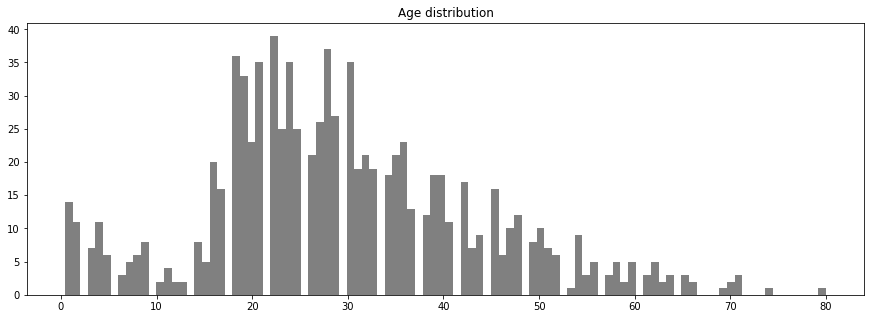

In [ ]:
# Гистограмма распределения возрастов 
plt.figure(figsize=(15,5))
plt.hist(titanic_dict['Age'], bins=100, color='grey');
plt.title('Age distribution');
plt.show();

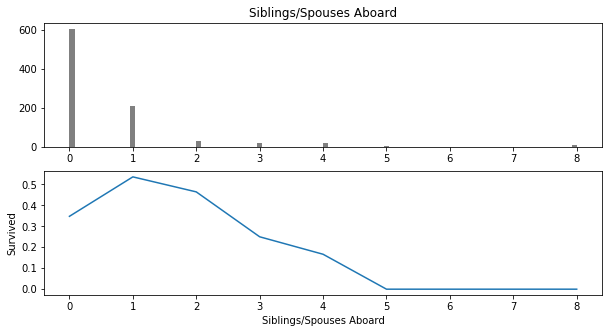

In [ ]:
# Определим долю выживших для уникальных значений признака 'Siblings/Spouses Aboard'
relatives_num = np.unique(titanic_dict['Siblings/Spouses Aboard'])
relatives_num = np.sort(relatives_num)
survived_total = []
for i in relatives_num:
    survived = titanic_dict['Survived'][np.where(titanic_dict['Siblings/Spouses Aboard'] == i)[0]]
    survived_total.append(survived.sum()/survived.size)
    
# Построим распределение признака 'Siblings/Spouses Aboard' и зависимость выживаемости от числа родственников 
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.hist(titanic_dict['Siblings/Spouses Aboard'], bins=100, color='grey');
plt.title('Siblings/Spouses Aboard');

plt.subplot(2,1,2)
plt.plot(relatives_num, survived_total);
plt.xlabel('Siblings/Spouses Aboard');
plt.ylabel('Survived')

plt.show();

In [ ]:
# Сформируем массив выживаемости для каждого класса
survived_lst = []
for pcls in np.unique(titanic_dict['Pclass']):
    survived = np.array(titanic_dict['Survived'])[np.where(titanic_dict['Pclass']==pcls)[0]]
    uniq, cnt = np.unique(survived, return_counts=True)
    survived_lst.append(cnt)
    print('PClass {}: {}'.format(pcls, cnt))

PClass 1: [ 80 136]
PClass 2: [97 87]
PClass 3: [368 119]


In [ ]:
survived_lst

[array([ 80, 136], dtype=int64),
 array([97, 87], dtype=int64),
 array([368, 119], dtype=int64)]

In [ ]:
# Преобразуем список списков survived_lst в двумерный массив
survived_arr = np.array(survived_lst)
survived_arr

array([[ 80, 136],
       [ 97,  87],
       [368, 119]], dtype=int64)

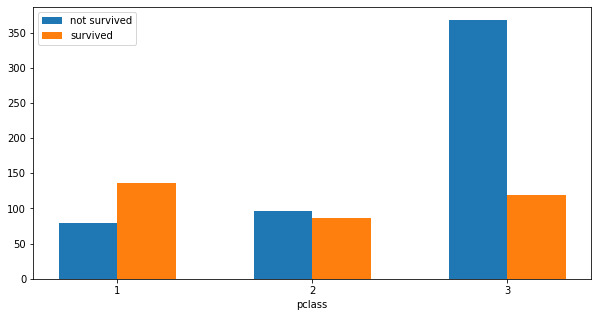

In [ ]:
# Построим зависимость выживаемости пассажира от класса (Pclass)
pclass_lst = np.arange(1, np.unique(titanic_dict['Pclass']).size + 1)
width = 0.3
plt.figure(figsize=(10,5))
plt.bar(pclass_lst - width/2, survived_arr[:,0], width, label='not survived')
plt.bar(pclass_lst + width/2, survived_arr[:,1], width, label='survived')
plt.xlabel('pclass')
plt.legend(['not survived', 'survived'])

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(3))

plt.show()

In [ ]:

# Построим распределения возрастов мужчин и женщин в отдельных графиках и 
# раскрасим выживших и не выживших в разные цвета

    

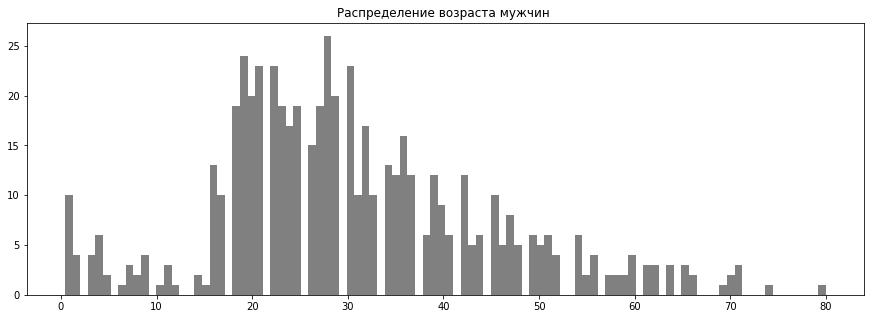

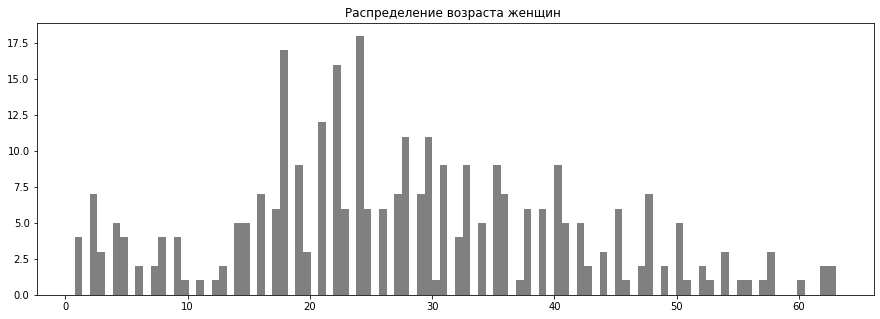

In [ ]:
for sx in np.unique(titanic_dict['Sex']):
    plt.figure(figsize=(15,5))
    plt.hist(titanic_dict['Age'][[np.where(titanic_dict['Sex']==sx)][0]], bins=100, color='grey');
    plt.title('Распределение возраста {} '.format(d_int_to_str[sx]));
    plt.xlabel('Возраста {}'.format(d_int_to_str[sx]))
    plt.show();

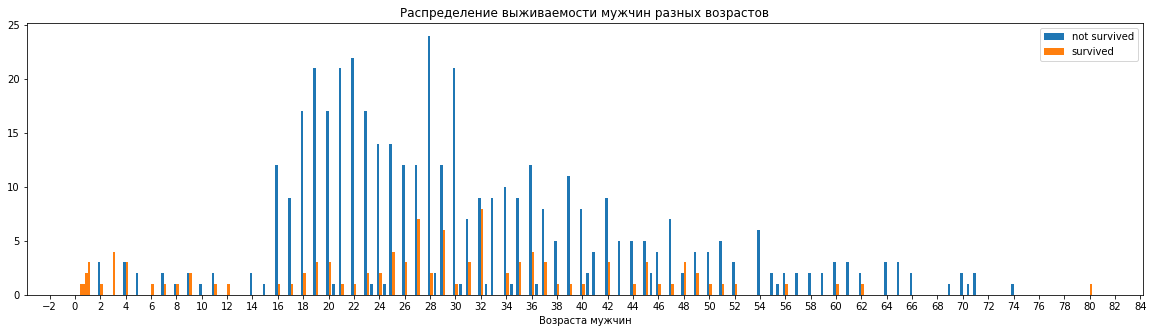

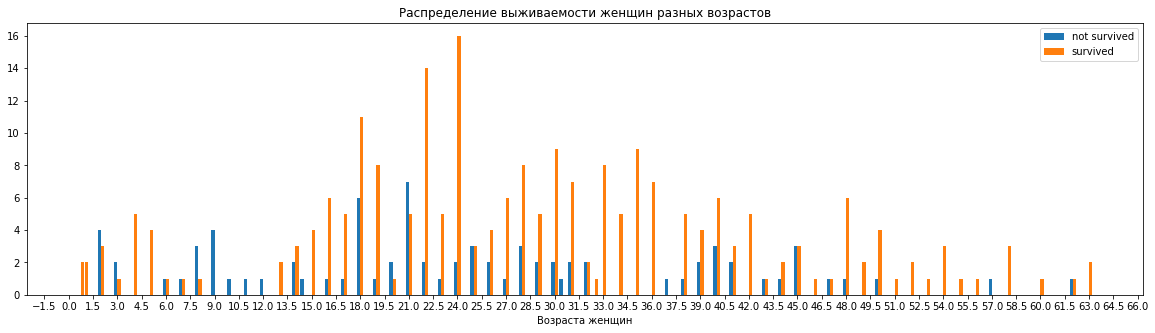

In [ ]:
for sx in np.unique(titanic_dict['Sex']):
    sex_indices = np.where(titanic_dict['Sex']==sx)
    
    age = np.array(titanic_dict['Age'][sex_indices[0]])
    survived = np.array(titanic_dict['Survived'][sex_indices[0]])
    
    ages_lst  = []
    for age_val in np.unique(age):
        age_indices = np.where(age==age_val)
        surv_age, cnts = np.unique(survived[age_indices], return_counts=True)
        if len(surv_age) == 1:
            if surv_age[0] == 0:
                cnts = np.append(cnts, 0)
            else:
                cnts = np.insert(cnts, 0, 0)
        ages_lst.append(cnts)
        
    survived_arr = np.array(ages_lst)
    
    # Построим зависимость выживаемости пола от возраста (Age)
    pclass_lst = np.unique(age)#np.arange(0, np.unique(age).size)
    width = 0.2
    plt.figure(figsize=(20, 5))
    plt.bar(pclass_lst - width/2, survived_arr[:,0], width, label='not survived')
    plt.bar(pclass_lst + width/2, survived_arr[:,1], width, label='survived')
    plt.xlabel('Возраста {}'.format(d_int_to_str[sx]))
    plt.legend(['not survived', 'survived'])
    plt.title('Распределение выживаемости {} разных возрастов'.format(d_int_to_str[sx]));
    
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(50))

    plt.show()

### Работа с текстовыми данными

In [ ]:
# Дополнительный признак: обращение к человеку
# Обращение ставится в начале имени и отделяется точкой.
appeal = np.unique([f.split('.')[0] for f in titanic_dict['Name']], return_counts=True)
for name, cnt in zip(appeal[0], appeal[1]):
    print(str(name)+': '+str(cnt))

Capt: 1
Col: 2
Don: 1
Dr: 7
Jonkheer: 1
Lady: 1
Major: 2
Master: 40
Miss: 182
Mlle: 2
Mme: 1
Mr: 513
Mrs: 125
Ms: 1
Rev: 6
Sir: 1
the Countess: 1


In [ ]:
# Выведем список детей мужского пола
[f for f in titanic_dict['Name'] if 'Master' in f][:10]

['Master. Gosta Leonard Palsson',
 'Master. Eugene Rice',
 'Master. Juha Niilo Panula',
 'Master. William Frederick Goodwin',
 'Master. Harald Skoog',
 'Master. Gerios Moubarek',
 'Master. Alden Gates Caldwell',
 'Master. Elias Nicola-Yarred',
 'Master. Thomas Henry Sage',
 'Master. Eino Viljami Panula']

In [ ]:
titanic_dict['Master'] = [int('Master' in f) for f in titanic_dict['Name']]
np.unique(titanic_dict['Master'], return_counts=True)

(array([0, 1]), array([847,  40], dtype=int64))

In [ ]:

# Создадим признак признак замужняя, незамужняя, остальные и построим распределение выживаемости

appeals = [i.split('.')[0] for i in titanic_dict['Name']]


In [ ]:
# условимся, что 'Mrs' - замужние
#                'Ms' - незамужние
#                ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',
#                 'Miss', 'Mlle', 'Mme', 'Mr', 'Rev', 'Sir', 'the Countess'] - все остальные 
np.unique(appeals)

array(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',
       'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
       'the Countess'], dtype='<U12')

In [ ]:
titanic_dict['Married'] = np.array([int(i=='Mrs') for i in appeals]).astype('int')
titanic_dict['Not married'] = np.array([int(i=='Ms') for i in appeals]).astype('int')
titanic_dict['Others'] = np.array([int(i not in ['Mrs', 'Ms']) for i in appeals]).astype('int')
list(titanic_dict)

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'Siblings/Spouses Aboard',
 'Parents/Children Aboard',
 'Fare',
 'Master',
 'Married',
 'Not married',
 'Others']

[[ 26  99]
 [  0   1]
 [519 242]]


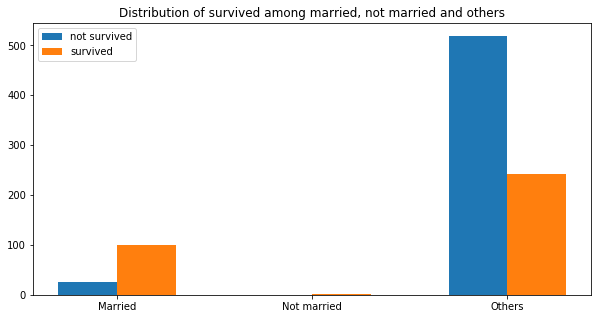

In [ ]:
# Сформируем массив выживаемости для каждого признака
survived_lst = []
for m in 'Married', 'Not married', 'Others':
    survived = np.array(titanic_dict['Survived'])[np.where(titanic_dict[m]==1)[0]]
    uniq, cnts = np.unique(survived, return_counts=True)
    if len(cnts) == 1:
            if uniq[0] == 0:
                cnts = np.append(cnts, 0)
            else:
                cnts = np.insert(cnts, 0, 0)
    survived_lst.append(cnts)
    #print('{}: {}'.format(m, cnts))

# Преобразуем список списков survived_lst в двумерный массив
survived_arr = np.array(survived_lst)
print(survived_arr)

# Построим зависимость выживаемости пассажира от Married
pclass_lst = np.arange(0, 3)
width = 0.3
plt.figure(figsize=(10,5))
plt.bar(pclass_lst - width/2, survived_arr[:,0], width, label='not survived')
plt.bar(pclass_lst + width/2, survived_arr[:,1], width, label='survived')
plt.title('Distribution of survived among married, not married and others')
plt.legend(['not survived', 'survived'])

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(2))

plt.xticks(pclass_lst, ('Married', 'Not married', 'Others'))

plt.show()